<h1>Workshop 3 - Data Visualisation</h1>
In the last workshop, we got Python to speak to an Arduino that was constantly reading data.

In this workshop, we'll start using Python to <b>control</b> the Arduino by telling it when to start reading data and how much data to read.

<h1>Python Activity 1 - Talking to your MKR</h1>

<b>For this Activity, you'll need the Arduino code in Workshop 3, Activity 1.</b> You can either copy it off the word/pdf doc or download it from the [Workshop 3 GitHub repo](https://github.com/joeforth/CHEM501_Workshop3).

The next two exercises are about getting Python to work with your Arduino. The code will require modification to work with your computer. As well as the comments in the code, look up the Common Bugs / FAQs sheet on the CHEM501 page - it may have the solution to your problems.

<h2>Exercise 1</h2>

First, we need to get Python talking to your MKR. Take a look at the code below. 

Review what you learnt in the previous workshop, look at the comments in the code, and get the code below working for *your* computer.

In [1]:
import serial
import serial.tools.list_ports
import pandas as pd
import numpy as np

# Connect to the Nicla
ports = serial.tools.list_ports.comports()
for n in ports:
    # Print the names of the devices connected to the computer - your Nicla will be one of them.
    print(n.description)
    print(n.device)
    # If your computer is a Mac, you can use the following lines to automatically set the Serial port:
    if 'Arduino' in n.description:
        dev = n.device

# You need to change the line below to the right Serial port for your Nicla:
dev = 'COM13'

# In general - baudrate=115200 and you shouldn't change it. You'll find tuning timeout can be useful for improving the quality of your data.
mkr = serial.Serial(port=dev, baudrate=115200, timeout=0.1)


USB Serial Device (COM13)
COM13


<h2>Exercise 2</h2>
Now we need to send a request to the arduino for <b>n_readings</b> measurements, just like we did when we sent the number of readings manually in the Serial Monitor. To do this, we use the <b>write</b> function in the <b>serial</b> module.

Take a look at the code below and the work through the exercises underneath it.

In [2]:
# Number of readings to take
n_readings = 1000
column_titles = ['time', 'temp', 'pressure', 'gas']

# Clear the buffer for the Nicla serial port - it may help to comment these 2 lines out, it may help to keep them!
# mkr.flush()
# mkr.reset_input_buffer()

# Start collecting data - tell the Nicla how many data points to take
mkr.write(bytes("{f0}".format(f0=n_readings), 'utf-8'))

# Create somewhere to store the data
data_table = np.zeros((n_readings, len(column_titles)))
# Uncomment the line below if you'd like to see what the data_table looks like - google "numpy zeros" to learn what the function is doing.
# print(data_table)

# Get the data from the Nicla
for n in range(n_readings):
    # Read data from the Nicla up to '/n'
    data = mkr.readline()
    # Split the line read from the Nicla every time it finds a ','
    data = np.fromstring(data, sep=',')
    # Unless the data has the correct length, ignore it
    if len(data) == len(column_titles):
        data_table[n,:] = data

# Close the serial port
mkr.close()

# Put the data in a DataFrame
tpg_data = pd.DataFrame(data_table, columns=column_titles)
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
995,68406.0,26.93,1007.58,62293.0
996,0.0,0.00,0.00,0.0
997,68546.0,26.93,1007.58,62162.0
998,0.0,0.00,0.00,0.0


Now do the following:

1. Search any lines of code that you don't understand on the internet - use Google, ChatGPT, or any tool you like to understand what's happening.

1. Get the code below working for *your* computer, remembering that some lines of code (e.g., `nicla.flush()` and `nicla.reset_input_buffer()`) help the code run on some computers, but stop it from working on others!

1. Modify the code so that `tpg_data` contains a large-ish number (e.g., 1000) of readings.

<h1>Take a Break</h3>
We'll look at the Digital Discovery article after the break and then move on with Python.

<h1>Python Activity 2 - Pandas</h1>

<h3>1.1 - Pandas? DataFrames?</h3>

In the last piece of code you used a module called pandas to create something called a DataFrame - let's spend some time getting used to what that means.

pandas is a module that helps you store, manipulate, and analyse your data. You can read more about it [here](https://pandas.pydata.org/docs/user_guide/10min.html).

A DataFrame is the thing pandas uses to store data. To access the DataFrame, you type its name and run the code:

In [3]:
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
995,68406.0,26.93,1007.58,62293.0
996,0.0,0.00,0.00,0.0
997,68546.0,26.93,1007.58,62162.0
998,0.0,0.00,0.00,0.0


You can access individual columns of the DataFrame by typing the name of the column:

In [4]:
tpg_data['temp']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
995    26.93
996     0.00
997    26.93
998     0.00
999    26.93
Name: temp, Length: 1000, dtype: float64

You can create a new DataFrame by selecting a part of another DataFrame that you're interested in:

In [5]:
data_filtered = tpg_data[['time', 'temp']]
data_filtered

,time,temp
0,0.0,0.00
1,0.0,0.00
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
...,...,...
995,68406.0,26.93
996,0.0,0.00
997,68546.0,26.93
998,0.0,0.00


You can select which bits of data you'd like to look at using mathematical operators (the code below selects all the rows where the measured temperature is greater than 0)

In [6]:
tpg_data[tpg_data['temp'] > 0]

,time,temp,pressure,gas
29,1699.0,26.84,1007.66,62469.0
31,1829.0,26.84,1007.66,62469.0
33,1979.0,26.84,1007.66,62162.0
35,2109.0,26.84,1007.62,62162.0
37,2249.0,26.84,1007.64,62337.0
...,...,...,...,...
991,68135.0,26.93,1007.58,62513.0
993,68276.0,26.93,1007.58,62293.0
995,68406.0,26.93,1007.58,62293.0
997,68546.0,26.93,1007.58,62162.0


<h2>Exercise 3</h2>

In this exercise, we're going to learn how to select rows of data in pandas using the 'loc' and 'iloc' commands. You can read more about them [here](https://pandas.pydata.org/docs/user_guide/10min.html) - under 'Selection'.

As a starting point, let's look at the following DataFrame: 

In [7]:
data_exercise3 = tpg_data
data_exercise3

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
995,68406.0,26.93,1007.58,62293.0
996,0.0,0.00,0.00,0.0
997,68546.0,26.93,1007.58,62162.0
998,0.0,0.00,0.00,0.0


There are 2 main ways to select rows of data in pandas. These are:

<h3>1. Selection by Location</h3>
Sometimes you just want to select data on a specific row - for this you use 'iloc'

In [8]:
# this will return the first 3 rows of the DataFrame data_exercise - note that Python starts counting from 0 and ignore the last number you're requesting here.
data_exercise3.iloc[0:3]

,time,temp,pressure,gas
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


<h3>2. Selection by Index</h3>
You see those numbers down the left-hand side of the DataFrame? They're called the 'index' of the row. Think of them as a unique reference number for each row:

In [9]:
# this will return rows that have an index with a value between 0 and 20 - again, Python starts at 0, but keeps you on your toes by including the last number you're requesting.
data_exercise3.loc[0:20]

,time,temp,pressure,gas
0,0.0,0.0,0.00,0.0
1,0.0,0.0,0.00,0.0
2,0.0,0.0,0.00,0.0
3,0.0,0.0,0.00,0.0
4,0.0,0.0,0.00,0.0
5,0.0,0.0,0.00,0.0
6,0.0,0.0,0.00,0.0
7,0.0,0.0,0.00,0.0
8,0.0,0.0,0.00,0.0
9,0.0,0.0,0.00,0.0


<h3>Now for the actual exercise</h3>

Write some Python that:

1. Creates a new DataFrame that only contains rows where the temperature values are greater than 0
1. Creates two more DataFrames, one with the first 5 rows selected using `loc`, and the other with first 5 rows selected using `iloc`.
1. Prints these two final DataFrames so you can compare which rows have been kept.

Are the two DataFrames different? If so, why?


<h3>Solution</h3>

You can find example solutions to these exercises on the Workshop Canvas page.

<h1>Python Activity 3 - Plotting Your Data</h1>
In this section, we're going to use pandas to plot the data from your Arduino.

First - re-run the code that you wrote for Hacking Exercises 1 and 2 that measured data and saved it in a DataFrame called tpg_data.

<h3>2.1 - Plotting Data</h3>
You've got some data, but it's just lots of numbers. We'll use a Python module called <b>matplotlib</b> to plot graphs of your data.

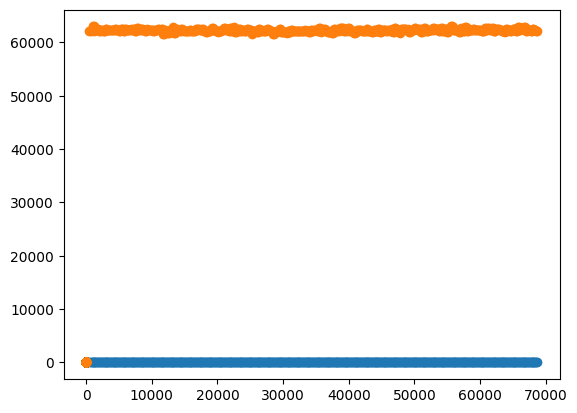

In [11]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False    # Remove annoying auto-offset
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()
# Add an axis to the figure
ax = fig.add_subplot(111)
# Tell the axis to plot the data - time on the x-axis, temperature on the y-axis
ax.scatter(tpg_data['time'], tpg_data['temp'])
# Tell the axis to plot the data - time on the x-axis, gas reading on the y-axis
ax.scatter(tpg_data['time'], tpg_data['gas'])
# Show the figure - not strictly necessary in jupyter notebook, but essential if you're writing a .py file
plt.show()

<h3>2.2 - Making the Plot Clearer</h3>
We can see the data, but our plot is missing basic information. Let's add some axes labels and a legend to distinguish the two datasets.

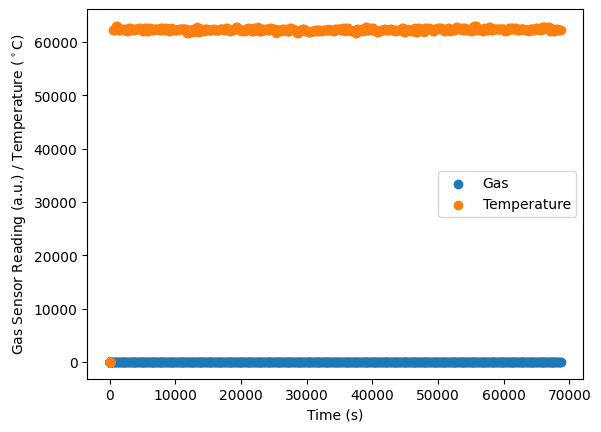

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'])
ax.scatter(tpg_data['time'], tpg_data['gas'])

# Add some labels and a legend to the plot
ax.set_xlabel('Time (s)')
# Bonus question - search online to find out what the funny r and $^\circ$ are doing in the line below
ax.set_ylabel(r'Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')
plt.legend(['Gas', 'Temperature'])
plt.show()

<h3>2.3 - Adding a Second Y-Axis</h3>
Our values for pressure and humidity are separated by a huge range. Let's fix this by adding a secondary y-axis on which we'll just plot humidity.


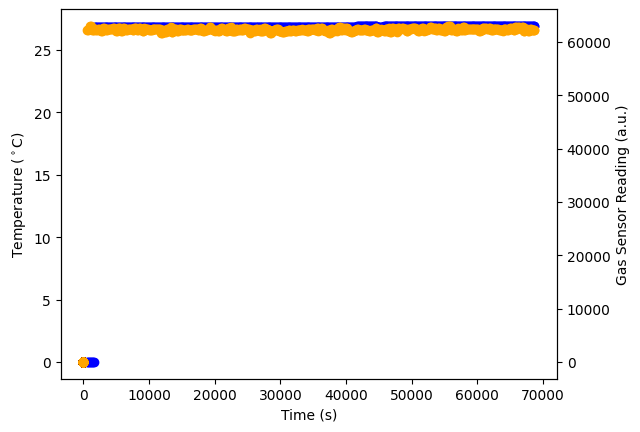

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue')
ax.set_ylabel(r'Temperature ($^\circ$C)')

# Add a second y-axis to the plot              
ax2 = ax.twinx()
# Plot a second data set on the second y-axis
ax2.scatter(tpg_data['time'], tpg_data['gas'], color='orange')
ax2.set_ylabel(r'Gas Sensor Reading (a.u.)')

ax.set_xlabel('Time (s)')
plt.show()

<h2>Exercise 4</h2>

Search online sources to find out how to do the following:

1. Change the font size of the tick labels on your plot
1. Change the values of the x- and y-limits so you can clearly read both datasets
1. Add a legend for both datasets to the graph - set its position and font size and think about how to make it clear which dataset belongs to which axis.


<h3>2.4 - Multiple Subplots</h3>

Instead of plotting two data sets on a single graph, we can also plot multiple graphs. Here we'll use two new things:

1. add_subplot - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

1 Using an (r,g,b) code to specify colour of the lines.

C:\Users\jwforth\AppData\Local\Temp\ipykernel_21356\1428718084.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(tpg_data['time'], tpg_data['gas'], c=(1.0, 0.0, 0.0))
C:\Users\jwforth\AppData\Local\Temp\ipykernel_21356\1428718084.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(tpg_data['time'], tpg_data['temp'], c=(0.0, 0.5, 0.5))


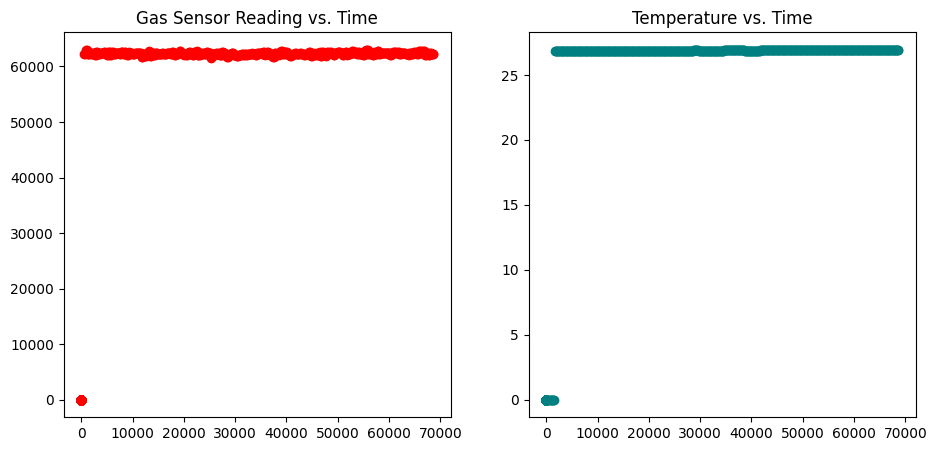

In [14]:
fig = plt.figure(figsize=(11,5))
# Create a subplot with 1 row and 2 columns - ax1 is in position 1
ax1 = fig.add_subplot(121)
# Create a subplot with 1 row and 2 columns - ax2 is in position 2
ax2 = fig.add_subplot(122)

# c=colour, it's used in the format c=(red, green, blue) where each value is between 0 and 1
ax1.scatter(tpg_data['time'], tpg_data['gas'], c=(1.0, 0.0, 0.0))
ax1.set_title('Gas Sensor Reading vs. Time')

ax2.scatter(tpg_data['time'], tpg_data['temp'], c=(0.0, 0.5, 0.5))
ax2.set_title('Temperature vs. Time')

plt.show()

<h3>2.5 - Data Filtering Using Pandas 1 - Filtering by Value</h3>
The plots above look pretty ugly - especially those 0 values. Let's look at two ways of filtering them out.

In the simplest approach, we can just look at values greater than zero. We saw how to do this earlier with Pandas:

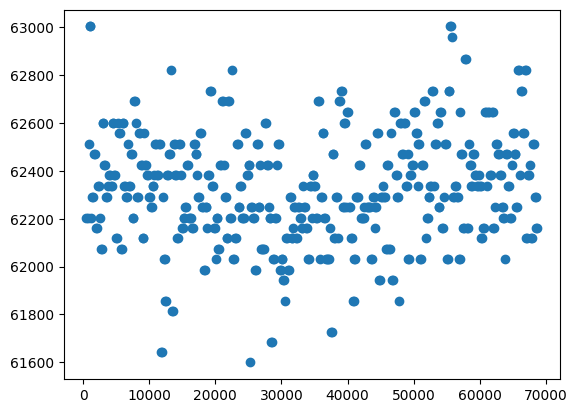

In [15]:
tpg_data_filter = tpg_data[tpg_data['gas'] > 0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data_filter['time'], tpg_data_filter['gas'])
plt.show()

<h2>Exercise 5</h2>
<h3>Data Filtering Using Pandas 2 - Filtering by Statistics</h3>

We can also filter our data using a statistical criterion. In the code below, we filter out code below the lowest 1% and above the highest 99% of values.

In [16]:
lower_bound = tpg_data['gas'].quantile(0.01)
upper_bound = tpg_data['gas'].quantile(0.99)

# Here's the tricky bit - we ignore values that are below the lower bound or above the upper bound - ask ChatGPT what the code is doing!
data_clean = tpg_data[(tpg_data['gas'] > lower_bound) & (tpg_data['gas'] < upper_bound)]
data_clean

,time,temp,pressure,gas
13,509.0,0.00,1007.68,62205.0
15,699.0,0.00,1007.64,62205.0
17,849.0,0.00,1007.64,62513.0
23,1269.0,0.00,1007.66,62205.0
25,1419.0,0.00,1007.66,62293.0
...,...,...,...,...
991,68135.0,26.93,1007.58,62513.0
993,68276.0,26.93,1007.58,62293.0
995,68406.0,26.93,1007.58,62293.0
997,68546.0,26.93,1007.58,62162.0


Write some Python that does the following:

1. Creates two plots
1. In one plot, use matplotlib's `plot` function (not `scatter`, like we've used so far) to plot the unfiltered data
1. In a second plot, use matplotlib's `plot` function to plot the filtered data - vary the range of data that you're excluding to make the graph look sensible (example shown below)

<h3>Solution</h3>

Solutions to the exercise can be found on the Workshop Canvas page

<h3>2.7 - Saving Your Graph</h3>

The code below saves your graph as a .png file - look up what `dpi` and `bbox_inches` do on the internet.

In [31]:
# Save graph - resolution @ 200 dots per inch, tight bounding box
filename = 'plot_name.png'

# The code below will save your figure to the directory where this code is stored.
plt.savefig(filename, dpi=200, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

<h2>Exercise 6 / Homework</h2>

Create a single piece of Python that connects to the MKR, takes 1000 readings, stores them in a DataFrame, filters out bad values, and plots all three (temperature, pressure, gas) sensor readings against time. Add axis labels and a legend to the plot. Save the plot as a .png file.

<h1>End of Workshop</h1>


<h3>Things to Explore in Your Spare Time</h3>

1. Use an rgb code to find the ugliest colour scheme possible for your graphs.

1. Modify the marker and line styles so your output from "plot" looks like a scatter plot.

1. Make two versions of your plots - a good one, that clearly shows the data, and a really bad one that is as ugly as possible. You can find the <b>many</b> settings that matplotlib will let you change [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
